#TRABAJO PRÁCTICO Nro. 2 DEEP LEARNING 
RED NEURONAL EN NUMPY - Optimización: Mini batch vs. First Orden Momentum

By Anahi Bazet

## Librerías, generación de X y cálculo del resultado esperado.

In [1]:
#Se importan las librerías.
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Se crea el array con los datos de entrada.
INPUT_X=np.linspace(0,6,10000)
print ("INPUT_X:\n", INPUT_X)
print ("El tamaño es:", len(INPUT_X))

INPUT_X:
 [0.00000000e+00 6.00060006e-04 1.20012001e-03 ... 5.99879988e+00
 5.99939994e+00 6.00000000e+00]
El tamaño es: 10000


In [3]:
#Se crea el array con los datos de salida (y).
EXPECTED_RESULT = -(INPUT_X-3)**2+2+0.1*np.sin(10*INPUT_X)
print ("EXPECTED_RESULT:\n", EXPECTED_RESULT)

EXPECTED_RESULT:
 [-7.         -6.99579994 -6.99160063 ... -7.0221366  -7.02630901
 -7.03048106]


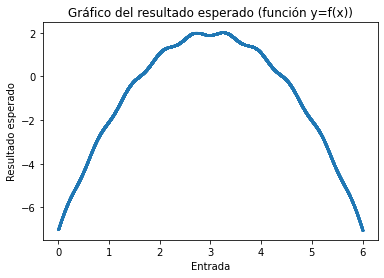

In [4]:
#Se grafica la función correspondiente al resultado esperado.
plt.plot(INPUT_X, EXPECTED_RESULT, marker='*',markersize=2)
plt.title("Gráfico del resultado esperado (función y=f(x))")
plt.ylabel("Resultado esperado")
plt.xlabel("Entrada")
plt.show()

## Experimento Nro. 1: presencia de épsilon.
Se utilizan los mismos hiperparámetros, tanto en Mini-Batch, como en First Orden Momentum, excepto por:
* épsilon=0.1 que se utiliza en First Orden Momentum solamente para controlar la velocidad.

NOTA: en todos los experimentos se inicializan los parámetros W1, W2 y b de ambos algoritmos con los mismos valores.

###Algoritmos

####Mini-batch

Se definen los parámetros w1, w2 y b.

In [5]:
#Se definen los parámetros w1, w2 y b de la única capa con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2))
print ("WL1:",WL1)

WL1: [0.5488135  0.71518937]


In [6]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1))
print ("bL1:",bL1)

bL1: [0.417022]


Se configuran los hiperparámetros y se inicializan las variables.

In [7]:
#Se definen los hiperparámetros:
n_epochs=300
alfa=0.001
batches=200
#Se inicializan objetos y variables:
MSE = []
y_hat_graphic = []
b=0
batch_size=int(len(INPUT_X)/batches)
print ("batch_size:",batch_size)

batch_size: 50


Se desarrolla el algoritmo.

In [8]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs):
  #print ("epochs",epochs)
  MSE_X=0

  for b in range(0,batches):
      #print ("Iteración:",b)
      
      #PASO 1: FORWARD
      X=INPUT_X[b*(batch_size):(b+1)*(batch_size)]
      #print ("X:",X)
      l1_act1 = WL1[0]*(X**2)+WL1[1]*X+bL1
      #print ("l1_act1:",l1_act1)
      y_hat = l1_act1
      if n_epochs==epochs+1:
        y_hat_graphic.append(y_hat)
        #print ("y_hat_graphic:\n",y_hat_graphic)
        #print ("y_hat:",y_hat)
      
     #PASO 2: ERROR
      y=EXPECTED_RESULT[b*(batch_size):(b+1)*(batch_size)]
      error=y-y_hat
      #if n_epochs==epochs+1:
        #print ("Expected_Result (y):",y)
        #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 1:
      DW1L1=-2*error*np.square(X)
      DW2L1=-2*error*X
      DbL1=-2*error
      #print ("DW1L1 (vectorizado):",DW1L1)
      #print ("DW2L1 (vectorizado):",DW2L1)
      #print ("DbL1 (vectorizado):",DbL1)
      DW1L1=sum(DW1L1)/batch_size
      DW2L1=sum(DW2L1)/batch_size
      DbL1=sum(DbL1)/batch_size
      #print ("DW1L1:",DW1L1)
      #print ("DW2L1:",DW2L1)
      #print ("DbL1:",DbL1)

      #PASO 4: Actualización de parámetros:
      #3 parámetros de la capa 1:
      WL1=WL1-alfa*np.array([DW1L1,DW2L1])
      bL1=bL1-alfa*DbL1
      #print ("WL1: ",WL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE de cada iteración:
      MSE_X=MSE_X+sum(np.square(error))/batch_size
      #print ("MSE_X",MSE_X)

  #Calcular el MSE del epoch:
  MSE.append(MSE_X/batches)  
  print ("Epochs:",epochs,"- Error:", MSE_X/batches)

Epochs: 0 - Error: 5.123985992176381
Epochs: 1 - Error: 3.5772588941715644
Epochs: 2 - Error: 3.318919216465283
Epochs: 3 - Error: 3.102515710392569
Epochs: 4 - Error: 2.918832766543953
Epochs: 5 - Error: 2.7608679250158774
Epochs: 6 - Error: 2.623277822690574
Epochs: 7 - Error: 2.5019663749011656
Epochs: 8 - Error: 2.393778102458586
Epochs: 9 - Error: 2.2962692791117183
Epochs: 10 - Error: 2.2075367533324655
Epochs: 11 - Error: 2.126089578705545
Epochs: 12 - Error: 2.05075247315915
Epochs: 13 - Error: 1.980592988685786
Epochs: 14 - Error: 1.9148663815851323
Epochs: 15 - Error: 1.852973727952346
Epochs: 16 - Error: 1.7944299765240104
Epochs: 17 - Error: 1.7388394786088859
Epochs: 18 - Error: 1.6858771616832218
Epochs: 19 - Error: 1.6352739773962837
Epochs: 20 - Error: 1.5868055989180505
Epochs: 21 - Error: 1.5402835981838405
Epochs: 22 - Error: 1.495548523777914
Epochs: 23 - Error: 1.4524644419804174
Epochs: 24 - Error: 1.4109146094343787
Epochs: 25 - Error: 1.3707980252304028
Epochs: 

#### First Orden Momentum

Se definen los parámetros w1, w2 y b.

In [9]:
#Se definen los parámetros w1, w2 y b de la única capa con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2))
print ("WL1:",WL1)

WL1: [0.5488135  0.71518937]


In [10]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1))
print ("bL1:",bL1)

bL1: [0.417022]


Se configuran los hiperparámetros y se inicializan las variables.

In [11]:
#Se definen los hiperparámetros:
n_epochs_FOM=300
alfa=0.001
batches=200
# épsilon es el hiperparámetro que regula la velocidad.
epsilon=0.1
#Se inicializan objetos y variables:
MSE_FOM = []
y_hat_graphic_FOM = []
b=0
VWL1=np.zeros(shape=2)
VbL1=np.zeros(shape=1)
batch_size=int(len(INPUT_X)/batches)
print ("batch_size:",batch_size)

batch_size: 50


Se desarrolla el algoritmo.

In [12]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs_FOM):
  #print ("epochs",epochs)
  MSE_X=0

  for b in range(0,batches):
      #print ("Iteración:",b)
      
      #PASO 1: FORWARD
      X=INPUT_X[b*(batch_size):(b+1)*(batch_size)]
      #print ("X:",X)
      l1_act1 = WL1[0]*(X**2)+WL1[1]*X+bL1
      #print ("l1_act1:",l1_act1)
      y_hat = l1_act1
      if n_epochs_FOM==epochs+1:
        y_hat_graphic_FOM.append(y_hat)
        #print ("y_hat_graphic:\n",y_hat_graphic_FOM)
        #print ("y_hat:",y_hat)
      
     #PASO 2: ERROR
      y=EXPECTED_RESULT[b*(batch_size):(b+1)*(batch_size)]
      error=y-y_hat
      #if n_epochs_FOM==epochs+1:
        #print ("Expected_Result (y):",y)
        #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 1:
      DW1L1=-2*error*np.square(X)
      DW2L1=-2*error*X
      DbL1=-2*error
      #print ("DW1L1 (vectorizado):",DW1L1)
      #print ("DW2L1 (vectorizado):",DW2L1)
      #print ("DbL1 (vectorizado):",DbL1)
      DW1L1=sum(DW1L1)/batch_size
      DW2L1=sum(DW2L1)/batch_size
      DbL1=sum(DbL1)/batch_size
      #print ("DW1L1:",DW1L1)
      #print ("DW2L1:",DW2L1)
      #print ("DbL1:",DbL1)

      #PASO 4: Actualización de parámetros:
      #3 parámetros de la capa 1:
      VWL1=epsilon*VWL1+alfa*np.array([DW1L1,DW2L1])
      WL1=WL1-VWL1
      VbL1=epsilon*VbL1+alfa*DbL1
      bL1=bL1-VbL1
      #print ("VWL1: ",VWL1)
      #print ("WL1: ",WL1)
      #print ("VbL1: ",VbL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE de cada iteración:
      MSE_X=MSE_X+sum(np.square(error))/batch_size
      #print ("MSE_X",MSE_X)

  #Calcular el MSE del epoch:
  MSE_FOM.append(MSE_X/batches)  
  print ("Epochs:",epochs,"- Error:", MSE_X/batches)

Epochs: 0 - Error: 5.0266938122031135
Epochs: 1 - Error: 3.482068112824524
Epochs: 2 - Error: 3.207277080855735
Epochs: 3 - Error: 2.9804287240691156
Epochs: 4 - Error: 2.7903124865169735
Epochs: 5 - Error: 2.6285770036187674
Epochs: 6 - Error: 2.4889702004813667
Epochs: 7 - Error: 2.366786487698723
Epochs: 8 - Error: 2.2584637202792113
Epochs: 9 - Error: 2.1612886121298343
Epochs: 10 - Error: 2.0731808191442025
Epochs: 11 - Error: 1.9925341897760263
Epochs: 12 - Error: 1.9180996449648284
Epochs: 13 - Error: 1.8488984436459628
Epochs: 14 - Error: 1.7841576852785972
Epochs: 15 - Error: 1.7232621338152165
Epochs: 16 - Error: 1.6657180602329853
Epochs: 17 - Error: 1.6111259668985587
Epochs: 18 - Error: 1.5591599014800261
Epochs: 19 - Error: 1.509551680586606
Epochs: 20 - Error: 1.4620787883457151
Epochs: 21 - Error: 1.41655503916152
Epochs: 22 - Error: 1.3728233303842206
Epochs: 23 - Error: 1.3307499836615322
Epochs: 24 - Error: 1.290220300731776
Epochs: 25 - Error: 1.25113505291106
Epoch

### Gráficos

####Mini-batch

Se realizan dos gráficos:
* El MSE para cada epoch.
* El resultado esperado con su respectiva función de regresión (y_hat).

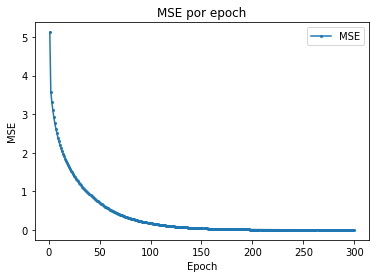

MSE del último epoch: 0.0036827302397347073


In [13]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs+1), MSE, marker='o',markersize=2,label='MSE')
plt.legend()
plt.title("MSE por epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
print ("MSE del último epoch:",MSE[-1])

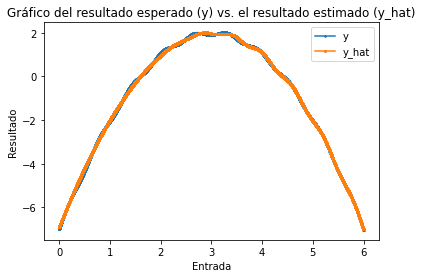

In [14]:
#Se grafica la función y e y_hat.
plt.plot(INPUT_X, EXPECTED_RESULT, marker='*',markersize=2,label='y')
plt.plot(INPUT_X, np.array(y_hat_graphic).flatten(), marker='o',markersize=2,label='y_hat')
plt.legend()
plt.title("Gráfico del resultado esperado (y) vs. el resultado estimado (y_hat)")
plt.ylabel("Resultado")
plt.xlabel("Entrada")
plt.show()

#### First Orden Momentum

Se realizan dos gráficos:
* El MSE para cada epoch.
* El resultado esperado con su respectiva función de regresión (y_hat).

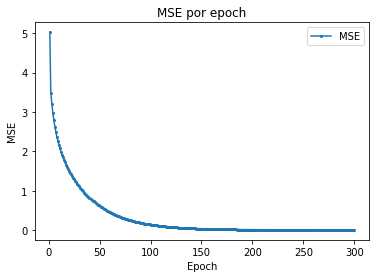

MSE del último epoch: 0.0033380056602350956


In [15]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs_FOM+1), MSE_FOM, marker='o',markersize=2,label='MSE')
plt.legend()
plt.title("MSE por epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
print ("MSE del último epoch:",MSE_FOM[-1])

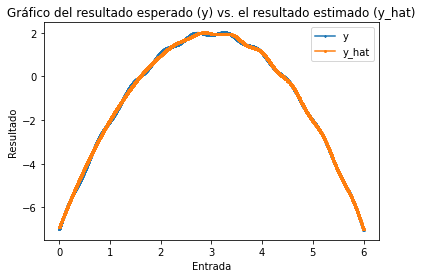

In [16]:
#Se grafica la función y e y_hat.
plt.plot(INPUT_X, EXPECTED_RESULT, marker='*',markersize=2,label='y')
plt.plot(INPUT_X, np.array(y_hat_graphic_FOM).flatten(), marker='o',markersize=2,label='y_hat')
plt.legend()
plt.title("Gráfico del resultado esperado (y) vs. el resultado estimado (y_hat)")
plt.ylabel("Resultado")
plt.xlabel("Entrada")
plt.show()

### Conclusiones: si ambos algoritmos convergen, ¿cómo incide épsilon en First Orden Momentum?

Si comparamos los gráficos del MSE en ambos algoritmos y observamos también dicha métrica en el último epoch, obtenemos los siguientes resultados.

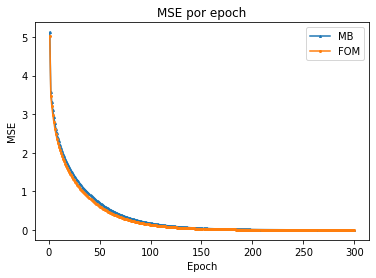

MSE del último epoch Mini-Batch: 0.0036827302397347073
MSE del último epoch First Orden Momentum: 0.0033380056602350956


In [17]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs+1), MSE, marker='^',markersize=2,label='MB')
plt.plot(range(1, n_epochs_FOM+1), MSE_FOM, marker='o',markersize=2,label='FOM')
plt.legend()
plt.title("MSE por epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
print ("MSE del último epoch Mini-Batch:",MSE[-1])
print ("MSE del último epoch First Orden Momentum:",MSE_FOM[-1])

Como conclusión, se puede visualizar en el gráfico que First Orden Momentum converge levente más rápido que Mini-Batch, esto es gracias a épsilon que controla la velocidad e impide que el gradiente realize "saltos".

NOTA: recordar que se utiliza la misma inicialización de parámetros en ambos algoritmos, y además, los hiperparámetros son exactamente los mismos, a excepción de que para First Orden Momentum se agrega épsilon=0.1.

## Experimento Nro. 2: modificación del learning rate (se aumenta).
Es similar al experimento Nro. 1, porque únicamente se modifica:
* alfa (learning rate)=0.002 en ambos algoritmos.

###Algoritmos

####Mini-batch

Se definen los parámetros w1, w2 y b.

In [18]:
#Se definen los parámetros w1, w2 y b de la única capa con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2))
print ("WL1:",WL1)

WL1: [0.5488135  0.71518937]


In [19]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1))
print ("bL1:",bL1)

bL1: [0.417022]


Se configuran los hiperparámetros y se inicializan las variables.

In [20]:
#Se definen los hiperparámetros:
n_epochs_2=300
alfa=0.002
batches=200
#Se inicializan objetos y variables:
MSE_2 = []
y_hat_graphic_2 = []
b=0
batch_size=int(len(INPUT_X)/batches)
print ("batch_size:",batch_size)

batch_size: 50


Se desarrolla el algoritmo.

In [21]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs_2):
  #print ("epochs",epochs)
  MSE_X=0

  for b in range(0,batches):
      #print ("Iteración:",b)
      
      #PASO 1: FORWARD
      X=INPUT_X[b*(batch_size):(b+1)*(batch_size)]
      #print ("X:",X)
      l1_act1 = WL1[0]*(X**2)+WL1[1]*X+bL1
      #print ("l1_act1:",l1_act1)
      y_hat = l1_act1
      if n_epochs_2==epochs+1:
        y_hat_graphic_2.append(y_hat)
        #print ("y_hat_graphic:\n",y_hat_graphic_2)
        #print ("y_hat:",y_hat)
      
     #PASO 2: ERROR
      y=EXPECTED_RESULT[b*(batch_size):(b+1)*(batch_size)]
      error=y-y_hat
      #if n_epochs_2==epochs+1:
        #print ("Expected_Result (y):",y)
        #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 1:
      DW1L1=-2*error*np.square(X)
      DW2L1=-2*error*X
      DbL1=-2*error
      #print ("DW1L1 (vectorizado):",DW1L1)
      #print ("DW2L1 (vectorizado):",DW2L1)
      #print ("DbL1 (vectorizado):",DbL1)
      DW1L1=sum(DW1L1)/batch_size
      DW2L1=sum(DW2L1)/batch_size
      DbL1=sum(DbL1)/batch_size
      #print ("DW1L1:",DW1L1)
      #print ("DW2L1:",DW2L1)
      #print ("DbL1:",DbL1)

      #PASO 4: Actualización de parámetros:
      #3 parámetros de la capa 1:
      WL1=WL1-alfa*np.array([DW1L1,DW2L1])
      bL1=bL1-alfa*DbL1
      #print ("WL1: ",WL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE de cada iteración:
      MSE_X=MSE_X+sum(np.square(error))/batch_size
      #print ("MSE_X",MSE_X)

  #Calcular el MSE del epoch:
  MSE_2.append(MSE_X/batches)  
  print ("Epochs:",epochs,"- Error:", MSE_X/batches)

Epochs: 0 - Error: 4.459498655980347
Epochs: 1 - Error: 2.8755630768471048
Epochs: 2 - Error: 2.485325201686687
Epochs: 3 - Error: 2.2147801145008343
Epochs: 4 - Error: 1.941072435430175
Epochs: 5 - Error: 1.862167772485781
Epochs: 6 - Error: 1.7265063545559827
Epochs: 7 - Error: 1.543570274213453
Epochs: 8 - Error: 1.541142936337268
Epochs: 9 - Error: 1.4300089398442046
Epochs: 10 - Error: 1.4519826987270679
Epochs: 11 - Error: 1.3256785467502255
Epochs: 12 - Error: 1.389071884965108
Epochs: 13 - Error: 1.1302209843537263
Epochs: 14 - Error: 1.3195008967182904
Epochs: 15 - Error: 1.4160556564933093
Epochs: 16 - Error: 1.084396170699565
Epochs: 17 - Error: 1.1118849493224134
Epochs: 18 - Error: 1.289850105246027
Epochs: 19 - Error: 1.1807586579591822
Epochs: 20 - Error: 1.7761823193945485
Epochs: 21 - Error: 1.4563529786809835
Epochs: 22 - Error: 1.011271707085709
Epochs: 23 - Error: 0.7394086980338261
Epochs: 24 - Error: 0.833907226752802
Epochs: 25 - Error: 0.6465130318344532
Epochs:

#### First Orden Momentum

Se definen los parámetros w1, w2 y b.

In [22]:
#Se definen los parámetros w1, w2 y b de la única capa con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2))
print ("WL1:",WL1)

WL1: [0.5488135  0.71518937]


In [23]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1))
print ("bL1:",bL1)

bL1: [0.417022]


Se configuran los hiperparámetros y se inicializan las variables.

In [24]:
#Se definen los hiperparámetros:
n_epochs_FOM_2=300
alfa=0.002
batches=200
# épsilon es el hiperparámetro que regula la velocidad.
epsilon=0.1
#Se inicializan objetos y variables:
MSE_FOM_2 = []
y_hat_graphic_FOM_2 = []
b=0
VWL1=np.zeros(shape=2)
VbL1=np.zeros(shape=1)
batch_size=int(len(INPUT_X)/batches)
print ("batch_size:",batch_size)

batch_size: 50


Se desarrolla el algoritmo.

In [25]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs_FOM_2):
  #print ("epochs",epochs)
  MSE_X=0

  for b in range(0,batches):
      #print ("Iteración:",b)
      
      #PASO 1: FORWARD
      X=INPUT_X[b*(batch_size):(b+1)*(batch_size)]
      #print ("X:",X)
      l1_act1 = WL1[0]*(X**2)+WL1[1]*X+bL1
      #print ("l1_act1:",l1_act1)
      y_hat = l1_act1
      if n_epochs_FOM_2==epochs+1:
        y_hat_graphic_FOM_2.append(y_hat)
        #print ("y_hat_graphic:\n",y_hat_graphic_FOM_2)
        #print ("y_hat:",y_hat)
      
     #PASO 2: ERROR
      y=EXPECTED_RESULT[b*(batch_size):(b+1)*(batch_size)]
      error=y-y_hat
      #if n_epochs_FOM_2==epochs+1:
        #print ("Expected_Result (y):",y)
        #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 1:
      DW1L1=-2*error*np.square(X)
      DW2L1=-2*error*X
      DbL1=-2*error
      #print ("DW1L1 (vectorizado):",DW1L1)
      #print ("DW2L1 (vectorizado):",DW2L1)
      #print ("DbL1 (vectorizado):",DbL1)
      DW1L1=sum(DW1L1)/batch_size
      DW2L1=sum(DW2L1)/batch_size
      DbL1=sum(DbL1)/batch_size
      #print ("DW1L1:",DW1L1)
      #print ("DW2L1:",DW2L1)
      #print ("DbL1:",DbL1)

      #PASO 4: Actualización de parámetros:
      #3 parámetros de la capa 1:
      VWL1=epsilon*VWL1+alfa*np.array([DW1L1,DW2L1])
      WL1=WL1-VWL1
      VbL1=epsilon*VbL1+alfa*DbL1
      bL1=bL1-VbL1
      #print ("VWL1: ",VWL1)
      #print ("WL1: ",WL1)
      #print ("VbL1: ",VbL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE de cada iteración:
      MSE_X=MSE_X+sum(np.square(error))/batch_size
      #print ("MSE_X",MSE_X)

  #Calcular el MSE del epoch:
  MSE_FOM_2.append(MSE_X/batches)  
  print ("Epochs:",epochs,"- Error:", MSE_X/batches)

Epochs: 0 - Error: 4.360931379110258
Epochs: 1 - Error: 2.7632416850303385
Epochs: 2 - Error: 2.3955764810514752
Epochs: 3 - Error: 2.125760192298223
Epochs: 4 - Error: 1.9216819709921986
Epochs: 5 - Error: 1.7606455303434316
Epochs: 6 - Error: 1.633802628722893
Epochs: 7 - Error: 1.5233555067829672
Epochs: 8 - Error: 1.427148318957951
Epochs: 9 - Error: 1.3350530635747413
Epochs: 10 - Error: 1.2537907160695287
Epochs: 11 - Error: 1.1872938721966884
Epochs: 12 - Error: 1.1229667725487047
Epochs: 13 - Error: 1.0730282041621733
Epochs: 14 - Error: 1.0224074563903964
Epochs: 15 - Error: 0.9720625808605089
Epochs: 16 - Error: 0.9418884303949331
Epochs: 17 - Error: 0.8930980633636474
Epochs: 18 - Error: 0.8560591552496151
Epochs: 19 - Error: 0.8193648305969493
Epochs: 20 - Error: 0.75928353478973
Epochs: 21 - Error: 0.7400430959329256
Epochs: 22 - Error: 0.6935852422628044
Epochs: 23 - Error: 0.6704251741051439
Epochs: 24 - Error: 0.646028618025704
Epochs: 25 - Error: 0.6029724109524143
Epo

### Gráficos

####Mini-batch

Se realizan dos gráficos:
* El MSE para cada epoch.
* El resultado esperado con su respectiva función de regresión (y_hat).

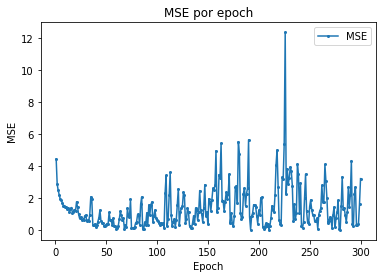

MSE del último epoch: 3.222932140047958


In [26]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs_2+1), MSE_2, marker='o',markersize=2,label='MSE')
plt.legend()
plt.title("MSE por epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
print ("MSE del último epoch:",MSE_2[-1])

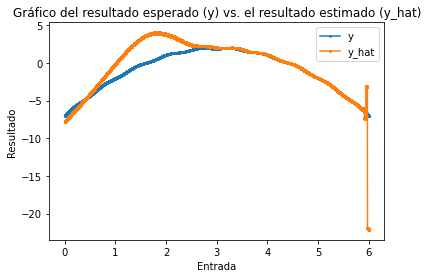

In [27]:
#Se grafica la función y e y_hat.
plt.plot(INPUT_X, EXPECTED_RESULT, marker='*',markersize=2,label='y')
plt.plot(INPUT_X, np.array(y_hat_graphic_2).flatten(), marker='o',markersize=2,label='y_hat')
plt.legend()
plt.title("Gráfico del resultado esperado (y) vs. el resultado estimado (y_hat)")
plt.ylabel("Resultado")
plt.xlabel("Entrada")
plt.show()

#### First Orden Momentum

Se realizan dos gráficos:
* El MSE para cada epoch.
* El resultado esperado con su respectiva función de regresión (y_hat).

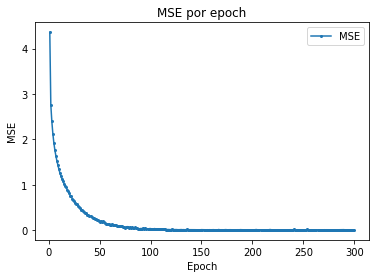

MSE del último epoch: 0.00352599093207467


In [28]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs_FOM_2+1), MSE_FOM_2, marker='o',markersize=2,label='MSE')
plt.legend()
plt.title("MSE por epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
print ("MSE del último epoch:",MSE_FOM_2[-1])

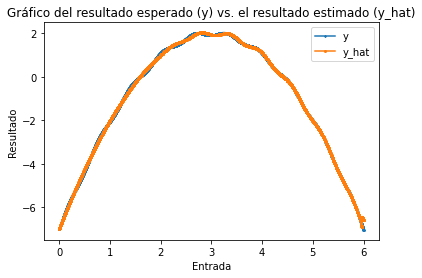

In [29]:
#Se grafica la función y e y_hat.
plt.plot(INPUT_X, EXPECTED_RESULT, marker='*',markersize=2,label='y')
plt.plot(INPUT_X, np.array(y_hat_graphic_FOM_2).flatten(), marker='o',markersize=2,label='y_hat')
plt.legend()
plt.title("Gráfico del resultado esperado (y) vs. el resultado estimado (y_hat)")
plt.ylabel("Resultado")
plt.xlabel("Entrada")
plt.show()

### Conclusiones: ¿por qué solo converge First Orden Momentum?

Si comparamos los gráficos del MSE en ambos algoritmos y observamos también dicha métrica en el último epoch, obtenemos los siguientes resultados.

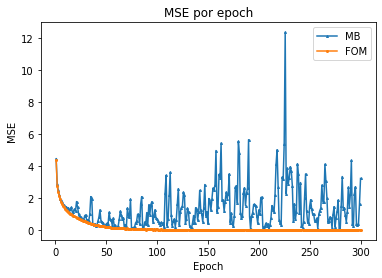

MSE del último epoch Mini-Batch: 3.222932140047958
MSE del último epoch First Orden Momentum: 0.00352599093207467


In [30]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs_2+1), MSE_2, marker='^',markersize=2,label='MB')
plt.plot(range(1, n_epochs_FOM_2+1), MSE_FOM_2, marker='o',markersize=2,label='FOM')
plt.legend()
plt.title("MSE por epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
print ("MSE del último epoch Mini-Batch:",MSE_2[-1])
print ("MSE del último epoch First Orden Momentum:",MSE_FOM_2[-1])

Como conclusión, se puede visualizar en el gráfico que First Orden Momentum converge, mientras que Mini-Batch no lo hace. Recordando que en el experimento nro. 1 ambos algoritmos convergían, es importante destacar que en este caso esto no sucedió para Mini-Batch, solo por el hecho de modificar el learning rate de 0.001 a 0.002. La diferencia entre ambos algoritmos radica en que First Orden Momentum posee épsilon para controlar la velocidad, por lo tanto, por más que el learning rate se aumente, épsilon evita que el gradiente pegue saltos, y en consecuencia, el algoritmo converge en 300 epochs (el MSE tiende a cero), mientras que Mini-Batch, no lo logra en esa cantidad de epochs con un learning rate más alto que en el primer experimento.

NOTA: recordar que se utiliza la misma inicialización de parámetros en ambos algoritmos, y además, los hiperparámetros son exactamente los mismos, a excepción de que para First Orden Momentum se agrega epsilon=0.1.

## Experimento Nro. 3: modificación de épsilon (se disminuye).
Es similar al experimento Nro. 2, porque únicamente se modifica:
* épsilon=0.01 en First Orden Momentum.

###Algoritmos

#### Mini-Batch

En este caso, no es necesario ejecutar el algoritmo mini-batch, ya que no sufre modificaciones con respecto al experimento nro. 2.

#### First Orden Momentum

Se definen los parámetros w1, w2 y b.

In [31]:
#Se definen los parámetros w1, w2 y b de la única capa con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2))
print ("WL1:",WL1)

WL1: [0.5488135  0.71518937]


In [32]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1))
print ("bL1:",bL1)

bL1: [0.417022]


Se configuran los hiperparámetros y se inicializan las variables.

In [33]:
#Se definen los hiperparámetros:
n_epochs_FOM_3=300
alfa=0.002
batches=200
# épsilon es el hiperparámetro que regula la velocidad.
epsilon=0.01
#Se inicializan objetos y variables:
MSE_FOM_3 = []
y_hat_graphic_FOM_3 = []
b=0
VWL1=np.zeros(shape=2)
VbL1=np.zeros(shape=1)
batch_size=int(len(INPUT_X)/batches)
print ("batch_size:",batch_size)

batch_size: 50


Se desarrolla el algoritmo.

In [34]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs_FOM_3):
  #print ("epochs",epochs)
  MSE_X=0

  for b in range(0,batches):
      #print ("Iteración:",b)
      
      #PASO 1: FORWARD
      X=INPUT_X[b*(batch_size):(b+1)*(batch_size)]
      #print ("X:",X)
      l1_act1 = WL1[0]*(X**2)+WL1[1]*X+bL1
      #print ("l1_act1:",l1_act1)
      y_hat = l1_act1
      if n_epochs_FOM_3==epochs+1:
        y_hat_graphic_FOM_3.append(y_hat)
        #print ("y_hat_graphic:\n",y_hat_graphic_FOM_3)
        #print ("y_hat:",y_hat)
      
     #PASO 2: ERROR
      y=EXPECTED_RESULT[b*(batch_size):(b+1)*(batch_size)]
      error=y-y_hat
      #if n_epochs_FOM_3==epochs+1:
        #print ("Expected_Result (y):",y)
        #print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 1:
      DW1L1=-2*error*np.square(X)
      DW2L1=-2*error*X
      DbL1=-2*error
      #print ("DW1L1 (vectorizado):",DW1L1)
      #print ("DW2L1 (vectorizado):",DW2L1)
      #print ("DbL1 (vectorizado):",DbL1)
      DW1L1=sum(DW1L1)/batch_size
      DW2L1=sum(DW2L1)/batch_size
      DbL1=sum(DbL1)/batch_size
      #print ("DW1L1:",DW1L1)
      #print ("DW2L1:",DW2L1)
      #print ("DbL1:",DbL1)

      #PASO 4: Actualización de parámetros:
      #3 parámetros de la capa 1:
      VWL1=epsilon*VWL1+alfa*np.array([DW1L1,DW2L1])
      WL1=WL1-VWL1
      VbL1=epsilon*VbL1+alfa*DbL1
      bL1=bL1-VbL1
      #print ("VWL1: ",VWL1)
      #print ("WL1: ",WL1)
      #print ("VbL1: ",VbL1)
      #print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE de cada iteración:
      MSE_X=MSE_X+sum(np.square(error))/batch_size
      #print ("MSE_X",MSE_X)

  #Calcular el MSE del epoch:
  MSE_FOM_3.append(MSE_X/batches)  
  print ("Epochs:",epochs,"- Error:", MSE_X/batches)

Epochs: 0 - Error: 4.450229200769055
Epochs: 1 - Error: 2.871961298705547
Epochs: 2 - Error: 2.5042327250665988
Epochs: 3 - Error: 2.222057544094041
Epochs: 4 - Error: 1.988974638531858
Epochs: 5 - Error: 1.870695095275623
Epochs: 6 - Error: 1.7612374049083488
Epochs: 7 - Error: 1.626789821726647
Epochs: 8 - Error: 1.536986301804852
Epochs: 9 - Error: 1.392527657333275
Epochs: 10 - Error: 1.3792003954768746
Epochs: 11 - Error: 1.231941520667851
Epochs: 12 - Error: 1.2958652734733602
Epochs: 13 - Error: 1.4592425495645205
Epochs: 14 - Error: 1.1625922921070142
Epochs: 15 - Error: 1.2236783043949453
Epochs: 16 - Error: 1.1187638792399452
Epochs: 17 - Error: 1.0778593414922413
Epochs: 18 - Error: 0.964543377851729
Epochs: 19 - Error: 1.2453453554362535
Epochs: 20 - Error: 0.9020872991187544
Epochs: 21 - Error: 1.0579934514061688
Epochs: 22 - Error: 0.9770937435864316
Epochs: 23 - Error: 1.105773509961444
Epochs: 24 - Error: 1.0584552739867754
Epochs: 25 - Error: 0.8808432672984339
Epochs:

### Gráficos

#### Mini-Batch

Aplican los mismos gráficos que en el experimiento nro. 2.

#### First Orden Momentum

Se realizan dos gráficos:
* El MSE para cada epoch.
* El resultado esperado con su respectiva función de regresión (y_hat).

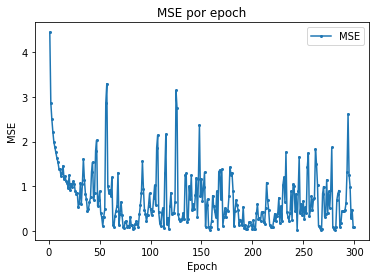

MSE del último epoch: 0.07907062451750207


In [35]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs_FOM_3+1), MSE_FOM_3, marker='o',markersize=2,label='MSE')
plt.legend()
plt.title("MSE por epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
print ("MSE del último epoch:",MSE_FOM_3[-1])

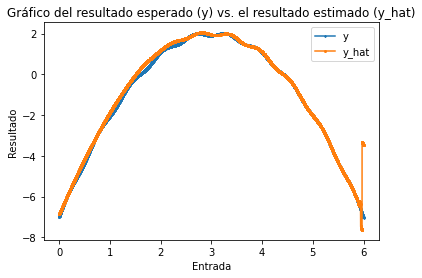

In [36]:
#Se grafica la función y e y_hat.
plt.plot(INPUT_X, EXPECTED_RESULT, marker='*',markersize=2,label='y')
plt.plot(INPUT_X, np.array(y_hat_graphic_FOM_3).flatten(), marker='o',markersize=2,label='y_hat')
plt.legend()
plt.title("Gráfico del resultado esperado (y) vs. el resultado estimado (y_hat)")
plt.ylabel("Resultado")
plt.xlabel("Entrada")
plt.show()

### Conclusiones: ¿por qué no se logra la convergencia en First Orden Momentum?

Si comparamos el gráfico del MSE de Mini-Batch del experimento nro. 2 con el del First Orden Momentum del experimento nro. 3, y observamos también dicha métrica en el último epoch, obtenemos los siguientes resultados.

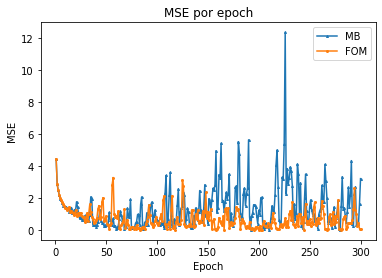

MSE del último epoch Mini-Batch: 3.222932140047958
MSE del último epoch First Orden Momentum: 0.07907062451750207


In [37]:
#Se grafica el MSE para cada epoch.
plt.plot(range(1, n_epochs_2+1), MSE_2, marker='^',markersize=2,label='MB')
plt.plot(range(1, n_epochs_FOM_3+1), MSE_FOM_3, marker='o',markersize=2,label='FOM')
plt.legend()
plt.title("MSE por epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
print ("MSE del último epoch Mini-Batch:",MSE_2[-1])
print ("MSE del último epoch First Orden Momentum:",MSE_FOM_3[-1])

Como conclusión, se puede visualizar en el gráfico que ninguno de los dos algoritmos convergen. Recordando que en el experimento nro. 2 First Orden Momentum sí convergía, es importante destacar que en este caso esto no sucedió solo por el hecho de modificar el épsilon de 0.1 a 0.01. Si bien épsilon controla la velocidad, si su valor es muy bajo (como aquí se presenta), no logra evitar que el gradiente pegue saltos, ya que se le da mayor importancia al learning rate, que en este caso, recordemos que es 0.002 (mayor al experimento nro. 1). No obstante, comparando ambos algoritmos, el MSE tiene picos menores en First Orden Momentun, lo que demuestra que hay alguna incidencia de épsilon, aunque no alcance para que el algoritmo converja.

NOTA: recordar que se utiliza la misma inicialización de parámetros en ambos algoritmos, y además, los hiperparámetros son exactamente los mismos, a excepción de que para First Orden Momentum se agrega épsilon=0.01.

##Anexo: cálculos 


El siguiente código es solo a modo de ejemplo para poder realizar el chequeo de los cálculos.
NOTA: se realiza con solo 12 muestras. Además, para ambos algoritmos se utiliza un 1 epoch y 4 batches.

In [38]:
#Se crea el array con los datos de entrada.
INPUT_X = np.array([0,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])
print ("INPUT_X:\n", INPUT_X)
print ("Tamaño de la muestra:",len(INPUT_X))

INPUT_X:
 [0.  1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Tamaño de la muestra: 12


In [39]:
#Se crea el array con los datos de salida (y).
EXPECTED_RESULT = -(INPUT_X-3)**2+2+0.1*np.sin(10*INPUT_X)
print ("EXPECTED_RESULT:\n", EXPECTED_RESULT)

EXPECTED_RESULT:
 [-7.         -2.05440211 -0.18497122  1.09129453  1.73676482  1.90119684
  1.70718173  1.07451132 -0.16490965 -2.02623749 -4.34997552 -7.03048106]


### Mini-batch

In [40]:
#Se definen los parámetros w1, w2 y b de la única capa con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2))
print ("WL1:",WL1)

WL1: [0.5488135  0.71518937]


In [41]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1))
print ("bL1:",bL1)

bL1: [0.417022]


In [42]:
#Se definen los hiperparámetros:
n_epochs=1
alfa=0.001
batches=4
#Se inicializan objetos y variables:
MSE = []
y_hat_graphic = []
b=0
batch_size=int(len(INPUT_X)/batches)
print ("batch_size:",batch_size)

batch_size: 3


In [43]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs):
  print ("Epochs:",epochs)
  MSE_X=0

  for b in range(0,batches):
      print ("Iteración:",b)
      
      #PASO 1: FORWARD
      X=INPUT_X[b*(batch_size):(b+1)*(batch_size)]
      print ("X:",X)
      l1_act1 = WL1[0]*(X**2)+WL1[1]*X+bL1
      print ("l1_act1:",l1_act1)
      y_hat = l1_act1
      print ("y_hat:",y_hat)
      if n_epochs==epochs+1:
        y_hat_graphic.append(y_hat)
        print ("y_hat_graphic:\n",y_hat_graphic)

      #PASO 2: ERROR
      y=EXPECTED_RESULT[b*(batch_size):(b+1)*(batch_size)]
      error=y-y_hat
      print ("Expected_Result (y):",y)
      print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 1:
      DW1L1=-2*error*np.square(X)
      DW2L1=-2*error*X
      DbL1=-2*error
      print ("DW1L1 (vectorizado):",DW1L1)
      print ("DW2L1 (vectorizado):",DW2L1)
      print ("DbL1 (vectorizado):",DbL1)
      DW1L1=sum(DW1L1)/batch_size
      DW2L1=sum(DW2L1)/batch_size
      DbL1=sum(DbL1)/batch_size
      print ("DW1L1:",DW1L1)
      print ("DW2L1:",DW2L1)
      print ("DbL1:",DbL1)

      #PASO 4: Actualización de parámetros:
      #3 parámetros de la capa 1:
      WL1=WL1-alfa*np.array([DW1L1,DW2L1])
      bL1=bL1-alfa*DbL1
      print ("WL1: ",WL1)
      print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE de cada iteración:
      MSE_X=MSE_X+sum(np.square(error))/batch_size
      print ("MSE_X:",MSE_X)

  #Calcular el MSE del epoch:
  MSE.append(MSE_X/batches)  
  print ("Epochs:",epochs,"- Error:", MSE_X/batches)

Epochs: 0
Iteración: 0
X: [0.  1.  1.5]
l1_act1: [0.417022   1.68102488 2.72463644]
y_hat: [0.417022   1.68102488 2.72463644]
y_hat_graphic:
 [array([0.417022  , 1.68102488, 2.72463644])]
Expected_Result (y): [-7.         -2.05440211 -0.18497122]
error:  [-7.417022   -3.73542699 -2.90960765]
DW1L1 (vectorizado): [ 0.          7.47085397 13.09323444]
DW2L1 (vectorizado): [0.         7.47085397 8.72882296]
DbL1 (vectorizado): [14.83404401  7.47085397  5.81921531]
DW1L1: 6.85469613851713
DW2L1: 5.399892311476143
DbL1: 9.3747044299172
WL1:  [0.54195881 0.70978947]
bL1:  [0.4076473]
MSE_X: 25.810482295784464
Iteración: 1
X: [2.  2.5 3. ]
l1_act1: [3.99506148 5.56936353 7.41464499]
y_hat: [3.99506148 5.56936353 7.41464499]
y_hat_graphic:
 [array([0.417022  , 1.68102488, 2.72463644]), array([3.99506148, 5.56936353, 7.41464499])]
Expected_Result (y): [1.09129453 1.73676482 1.90119684]
error:  [-2.90376695 -3.83259871 -5.51344815]
DW1L1 (vectorizado): [23.23013564 47.90748386 99.24206679]
DW2L1

### First Orden Momentum

In [44]:
#Se definen los parámetros w1, w2 y b de la única capa con su semilla respectiva para lograr reproducibilidad.
np.random.seed(0)
WL1=np.random.uniform(0,1,(2))
print ("WL1:",WL1)

WL1: [0.5488135  0.71518937]


In [45]:
np.random.seed(1)
bL1=np.random.uniform(0,1,(1))
print ("bL1:",bL1)

bL1: [0.417022]


In [46]:
#Se definen los hiperparámetros:
n_epochs_FOM=1
alfa=0.001
batches=4
# épsilon es el hiperparámetro que regula la velocidad.
epsilon=0.1
#Se inicializan objetos y variables:
MSE_FOM = []
y_hat_graphic_FOM = []
b=0
VWL1=np.zeros(shape=2)
VbL1=np.zeros(shape=1)
batch_size=int(len(INPUT_X)/batches)
print ("batch_size:",batch_size)

batch_size: 3


In [47]:
#Se desarrolla el algoritmo principal según el pseudocódigo solicitado.
for epochs in range(n_epochs_FOM):
  print ("epochs",epochs)
  MSE_X=0

  for b in range(0,batches):
      print ("Iteración:",b)
      
      #PASO 1: FORWARD
      X=INPUT_X[b*(batch_size):(b+1)*(batch_size)]
      print ("X:",X)
      l1_act1 = WL1[0]*(X**2)+WL1[1]*X+bL1
      print ("l1_act1:",l1_act1)
      y_hat = l1_act1
      print ("y_hat:",y_hat)
      if n_epochs_FOM==epochs+1:
        y_hat_graphic_FOM.append(y_hat)
        print ("y_hat_graphic:\n",y_hat_graphic_FOM)
      
     #PASO 2: ERROR
      y=EXPECTED_RESULT[b*(batch_size):(b+1)*(batch_size)]
      error=y-y_hat
      print ("Expected_Result (y):",y)
      print ("error: ",error)

      #PASO 3: BACKWARD
      #3 parámetros de la capa 1:
      DW1L1=-2*error*np.square(X)
      DW2L1=-2*error*X
      DbL1=-2*error
      print ("DW1L1 (vectorizado):",DW1L1)
      print ("DW2L1 (vectorizado):",DW2L1)
      print ("DbL1 (vectorizado):",DbL1)
      DW1L1=sum(DW1L1)/batch_size
      DW2L1=sum(DW2L1)/batch_size
      DbL1=sum(DbL1)/batch_size
      print ("DW1L1:",DW1L1)
      print ("DW2L1:",DW2L1)
      print ("DbL1:",DbL1)

      #PASO 4: Actualización de parámetros:
      #3 parámetros de la capa 1:
      VWL1=epsilon*VWL1+alfa*np.array([DW1L1,DW2L1])
      WL1=WL1-VWL1
      VbL1=epsilon*VbL1+alfa*DbL1
      bL1=bL1-VbL1
      print ("VWL1: ",VWL1)
      print ("WL1: ",WL1)
      print ("VbL1: ",VbL1)
      print ("bL1: ",bL1)

      #PASO 5: Calcular el MSE de cada iteración:
      MSE_X=MSE_X+sum(np.square(error))/batch_size
      print ("MSE_X:",MSE_X)

  #Calcular el MSE del epoch:
  MSE_FOM.append(MSE_X/batches)  
  print ("Epochs:",epochs,"- Error:", MSE_X/batches)

epochs 0
Iteración: 0
X: [0.  1.  1.5]
l1_act1: [0.417022   1.68102488 2.72463644]
y_hat: [0.417022   1.68102488 2.72463644]
y_hat_graphic:
 [array([0.417022  , 1.68102488, 2.72463644])]
Expected_Result (y): [-7.         -2.05440211 -0.18497122]
error:  [-7.417022   -3.73542699 -2.90960765]
DW1L1 (vectorizado): [ 0.          7.47085397 13.09323444]
DW2L1 (vectorizado): [0.         7.47085397 8.72882296]
DbL1 (vectorizado): [14.83404401  7.47085397  5.81921531]
DW1L1: 6.85469613851713
DW2L1: 5.399892311476143
DbL1: 9.3747044299172
VWL1:  [0.0068547  0.00539989]
WL1:  [0.54195881 0.70978947]
VbL1:  [0.0093747]
bL1:  [0.4076473]
MSE_X: 25.810482295784464
Iteración: 1
X: [2.  2.5 3. ]
l1_act1: [3.99506148 5.56936353 7.41464499]
y_hat: [3.99506148 5.56936353 7.41464499]
y_hat_graphic:
 [array([0.417022  , 1.68102488, 2.72463644]), array([3.99506148, 5.56936353, 7.41464499])]
Expected_Result (y): [1.09129453 1.73676482 1.90119684]
error:  [-2.90376695 -3.83259871 -5.51344815]
DW1L1 (vectoriz